# Notebook illustrating the use of the RateDistortion module

This notebook illustrates the use of the RateDistortion module. The most important function is ``getRD``, which calculates the rate-distortion function $R(D)$ given a prior probability $p_x$ (stored in ``px``) and a distortion function $d(x,y)$ (stored in ``dxy``).

If $x \in \mathcal{X}$ and $y \in \mathcal{Y}$, then ``px`` is a $|\mathcal{X}|$-dimensional numpy vector, and ``dxy`` is a $|\mathcal{X}|\times|\mathcal{Y}|$ numpy matrix.

The value returned by ``getRD`` is a Python dictionary, i.e. ``dict``, with elements:
* ``Dmax_v`` - containing the vector of $D$ at which $R(D)$ is calculated
* ``r_v`` - containing the corresponding values of $R(D)$
* ``p`` - containing the joint distributions $p(x,y)$ that are used to obtain $R(D)$ at each point

The parameters can be changed in the cell with the leading comment ``# Parameters``, below.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RateDistortion import *

In [2]:
# Parameters

# prior probability of x, which is ternary
px = np.array([0.3,0.4,0.3])

# distortion function - in this example, there are two possible elements of y for each x
dxy = np.array([[2,0,1],[0,2,1]])

# In the final cell, we display the solution p(x|y) for D nearest this target
D_target = 0.5

In [3]:
# To suppress the progress bar, either set show_pb=False,
# or delete the show_pb=True parameter (False is the default value)
rd = getRD(px,dxy,show_pb=True)

Text(0.5, 0, 'Average distortion $D$')

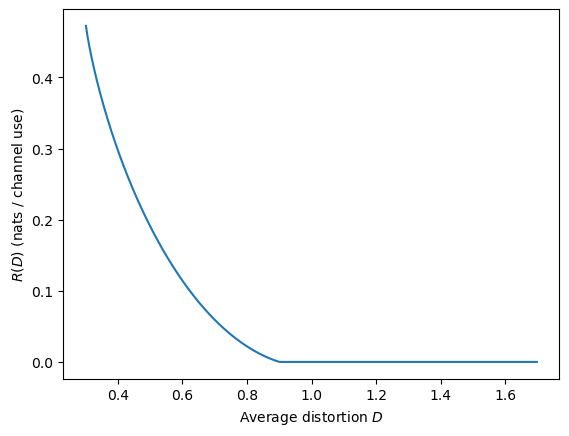

In [4]:
# generates the plot

R = rd['r_v']
D = rd['Dmax_v']
plt.plot(D,R)

ax = plt.gca()
ax.set_ylabel('$R(D)$ (nats / channel use)')
ax.set_xlabel('Average distortion $D$')

In [5]:
# finds and prints the conditional probability p(y|x) achieving R(D) at D ~= D_target

i = np.sum(D < D_target)

# joint probability of x and y in matrix form
ny = np.shape(dxy)[0] # size of y alphabet
nx = np.shape(dxy)[1] # size of x alphabet
pxy = unstack(rd['p'][i],ny,nx) 

p_y_given_x = pxy @ np.linalg.inv(np.diag(px))
print(p_y_given_x)

# as this is a probability of y given x, the vertical sums should be equal to 1
# uncomment the following line to see this
# print(np.sum(p_y_given_x,axis=0))


[[0.20037712 0.89978234 0.59999271]
 [0.79962288 0.10021766 0.40000729]]
